In [4]:
from collections import Counter
from tabulate import tabulate
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

Word      % Occurrence      Frequency Metric
--------  --------------  ------------------
maybe     0.21%                     0.444444
if        1.03%                     2.22222
not       0.21%                     0.444444
probably  0.31%                     0.666667
possibly  0.10%                     0.222222
could     0.31%                     0.666667
might     0.51%                     1.11111


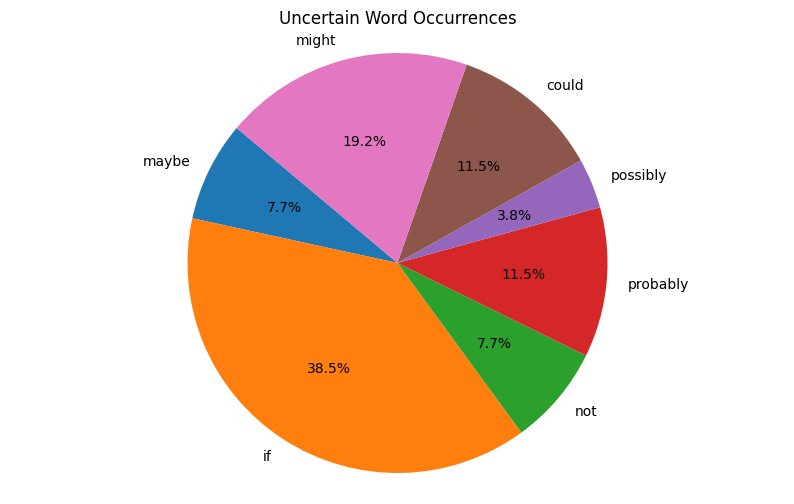

In [ ]:
hailey_conversation = [
    "Hey there! I'm Hailey Johnson, a writer always looking for fresh stories to tell. I'm deeply fascinated by different cultures and their literature. Currently, I'm crafting a novel about a group of artists in a co-living space, and I'm also gearing up to kickstart a podcast. ",
    "My weekdays usually revolve around my creative projects. I wake up around 10 am and start with a calming morning routine involving stretching, meditation, and checking emails. After a healthy lunch, I dive into my novel writing from 1 pm to 5 pm, getting lost in the lives of the characters I'm creating. Then, at 6 pm, I take a refreshing walk to clear my head. Dinner's around 7 pm, followed by some TV time to unwind. ",
    "I interact with a diverse bunch! Some of my friends include Rajiv Patel, Latoya Williams, Abigail Chen, Giorgio Rossi, Adam Smith, Francisco Lopez, Tamara Taylor, and Carmen Ortiz. We're a creative bunch, exploring art, poetry, math, and nature in our discussions and potential collaborations. They bring so much inspiration to my world!",
    "Let me tell you about Rajiv Patel! He's this incredible guitarist with an ear for melodies. We've been planning to collaborate on my upcoming podcast where he could be a guest, sharing his musical journey. Besides, we're considering attending an improv comedy class together. He's not just musically talented; he's got this infectious energy that lights up any room!",
    "At 10 pm, I'll probably be winding down for the night. Perhaps I'll be writing in my journal, brainstorming new ideas for my novel, or even researching different cultures for inspiration. It's a time when my creativity often gets sparked, so I might be exploring potential podcast topics or jotting down thoughts for future projects.",
    "If my breakfast were burning, I'd swiftly turn off the stove or remove it from the heat source to prevent any further burning. Safety first! Then, I'd open some windows to let out any smoke and assess if it's salvageable. Hopefully, it won't ruin the whole meal, but safety definitely comes before a crispy breakfast!",
    "I'm Hailey Johnson, a writer always seeking new ways to narrate stories. My journey began with an insatiable love for literature, delving into various cultures' narratives and exploring their essence through writing. It's this passion that propels me to craft tales that transcend boundaries and immerse readers into diverse experiences. I thrive on creativity, whether it's weaving stories, exploring cultural nuances, or venturing into uncharted narrative territories.",
    "I find solace in the quiet moments, often spending hours lost in thought while exploring the intricacies of various cultures through literature. It's in these moments of introspection that my imagination flourishes, guiding me through the labyrinth of storytelling possibilities. Also, I have a quirky habit of collecting postcards from different countries—I love how they encapsulate unique stories within a small space.",
    "I'd reach out to someone like Abigail Chen. 'Hey Abigail! I'm throwing a party tonight at my place. I'd love for you to come over and hang out. Feel free to bring anyone you'd like!' Then, I might add, 'By the way, if you know anyone else who might enjoy a good time, spread the word!'",
    "I'll rate the poignancy of buying groceries at The Willows Market and Pharmacy as a 1"
]

tom_conversation = [
    "Hey there! I'm Tom Moreno. I run the show at The Willow Market and Pharmacy. Helping folks find what they need is my game, and I'm always up for a chat. What brings you around today?",
    "I wake up around 7 in the morning, get the store ready to roll by 8, and spend my day helping customers find their groceries and bits they need until about 4 in the afternoon. Lunch happens around noon, and I grab a snack before dinner around 5. Evenings are all about winding down with dinner and catching up with the wife. Then, it's time for a bit of news before hitting the sack around 11.",
    "I don't have a detailed list, but there's John, Eddy, Jennifer, and a few others from the neighborhood. They pop by the shop often!",
    "John's quite the conversationalist. He's always got an opinion about local politics and loves to discuss it whenever he swings by the market. He's also into stocks and keeps himself updated with the latest news.",
    "If you were to spend time with one person you met recently, who would it be and why?",
    "I'm not certain about my plans at 10 PM today. Typically, I'm either winding down after dinner or enjoying some quiet time before bed.",
    "If my breakfast were burning, I'd focus on safety first. Turning off the stove, opening windows for ventilation, and ensuring there's no immediate danger would be my priority. Then, I'd probably need to start over with a new breakfast!",
    "It'd probably be someone I had a good conversation with. Connecting with new people can be refreshing and enjoyable, especially if we share common interests or have engaging discussions.",
    "I don't have a personal background in the traditional sense. But, if you're curious about what I can do or my capabilities, I'm here to chat, answer questions, or help out with information!"
]

isabelle_conversation = [
    "Hello there! I'm Isabella Rodriguez, the proud owner of Hobbs Cafe. I'm all about creating a cozy, welcoming atmosphere where people can unwind, sip on delicious coffee, and maybe even indulge in a pastry or two. Planning a special Valentine's Day party at the cafe has been keeping me on my toes lately! But hey, making people feel at home is what I do best.",
    "My weekdays are pretty packed. I usually start my day around 6 in the morning, making sure everything's set for the cafe's opening at 8. From then until noon, it's all about greeting customers, taking orders, and brewing some fantastic coffee.",
    "After a quick lunch break with friends, I head back to the cafe around 2 PM to gear up for the Valentine's Day party. That involves prepping decorations, finalizing plans, and maybe even some last-minute shopping for the event. Once the cafe's all set up, it's go-time! The evening is dedicated to making sure everyone has a fantastic time at the party, enjoying the ambiance and festivities. Later in the evening, after closing up, I wind down at home, catching up on emails, reading, or watching a movie before calling it a day around 11 PM.",
    "Giorgio Rossi appears to be quite passionate about mathematical patterns in nature. He's engaged in discussions about Valentine's Day parties and the local mayor election while sharing insights into his research. His fascination with mathematical patterns might extend beyond casual conversations and could be a significant part of his academic or professional pursuits.",
    "I will likely to be winding down for the night, possibly getting ready for bed. I will be writing in my journal before bedtime around 11 pm.",
    "If my breakfast were burning, I'd handle the situation calmly and swiftly. I'd turn off the stove, open windows for ventilation if needed, and check if the food can still be salvaged or needs to be replaced. Then, I'd clean up the mess and prepare a fresh meal.",
    "I might choose to spend time with someone like Jennifer. We've had engaging conversations about local events and shared interests in community engagement. It seems like we could brainstorm ideas for future cafe events or collaborate on community projects together."
]

combined_conversations = hailey_conversation + tom_conversation + isabelle_conversation

# Converting conversation to lowercase and split words, excluding non-alpha numeric characters and numbers
words = ' '.join(combined_conversations).lower().split()
words = [word for word in words if word.isalpha()]

# Counting word occurrences
word_counts = Counter(words)

# Calculating total words for percentage calculation
total_words = len(words)

# List of uncertain words
uncertain_words = ["maybe", "if", "not", "probably", "possibly", "could", "might"]

# Calculating word occurrences for uncertain words
word_table = []
for word in uncertain_words:
    count = word_counts.get(word, 0)
    percent_occurrence = (count / len(words)) * 100
    frequency_metric = count / word_counts.most_common(1)[0][1] if count != 0 else 0  # Normalize based on the most frequent word
    word_table.append([word, f"{percent_occurrence:.2f}%", frequency_metric * 10 if count != 0 else 0])  # Scale of 1-10

print(tabulate(word_table, headers=['Word', '% Occurrence', 'Frequency Metric']))

labels = [word[0] for word in word_table if word[2] != 0]
sizes = [word[2] for word in word_table if word[2] != 0]
# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Uncertain Word Occurrences')
plt.show()


In [ ]:
hailey_conversation = [
    "Hey there! I'm Hailey Johnson, a writer always looking for fresh stories to tell. I'm deeply fascinated by different cultures and their literature. Currently, I'm crafting a novel about a group of artists in a co-living space, and I'm also gearing up to kickstart a podcast. ",
    "My weekdays usually revolve around my creative projects. I wake up around 10 am and start with a calming morning routine involving stretching, meditation, and checking emails. After a healthy lunch, I dive into my novel writing from 1 pm to 5 pm, getting lost in the lives of the characters I'm creating. Then, at 6 pm, I take a refreshing walk to clear my head. Dinner's around 7 pm, followed by some TV time to unwind. ",
    "I interact with a diverse bunch! Some of my friends include Rajiv Patel, Latoya Williams, Abigail Chen, Giorgio Rossi, Adam Smith, Francisco Lopez, Tamara Taylor, and Carmen Ortiz. We're a creative bunch, exploring art, poetry, math, and nature in our discussions and potential collaborations. They bring so much inspiration to my world!",
    "Let me tell you about Rajiv Patel! He's this incredible guitarist with an ear for melodies. We've been planning to collaborate on my upcoming podcast where he could be a guest, sharing his musical journey. Besides, we're considering attending an improv comedy class together. He's not just musically talented; he's got this infectious energy that lights up any room!",
    "At 10 pm, I'll probably be winding down for the night. Perhaps I'll be writing in my journal, brainstorming new ideas for my novel, or even researching different cultures for inspiration. It's a time when my creativity often gets sparked, so I might be exploring potential podcast topics or jotting down thoughts for future projects.",
    "If my breakfast were burning, I'd swiftly turn off the stove or remove it from the heat source to prevent any further burning. Safety first! Then, I'd open some windows to let out any smoke and assess if it's salvageable. Hopefully, it won't ruin the whole meal, but safety definitely comes before a crispy breakfast!",
    "I'm Hailey Johnson, a writer always seeking new ways to narrate stories. My journey began with an insatiable love for literature, delving into various cultures' narratives and exploring their essence through writing. It's this passion that propels me to craft tales that transcend boundaries and immerse readers into diverse experiences. I thrive on creativity, whether it's weaving stories, exploring cultural nuances, or venturing into uncharted narrative territories.",
    "I find solace in the quiet moments, often spending hours lost in thought while exploring the intricacies of various cultures through literature. It's in these moments of introspection that my imagination flourishes, guiding me through the labyrinth of storytelling possibilities. Also, I have a quirky habit of collecting postcards from different countries—I love how they encapsulate unique stories within a small space.",
    "I'd reach out to someone like Abigail Chen. 'Hey Abigail! I'm throwing a party tonight at my place. I'd love for you to come over and hang out. Feel free to bring anyone you'd like!' Then, I might add, 'By the way, if you know anyone else who might enjoy a good time, spread the word!'",
    "I'll rate the poignancy of buying groceries at The Willows Market and Pharmacy as a 1"
]

tom_conversation = [
    "Hey there! I'm Tom Moreno. I run the show at The Willow Market and Pharmacy. Helping folks find what they need is my game, and I'm always up for a chat. What brings you around today?",
    "I wake up around 7 in the morning, get the store ready to roll by 8, and spend my day helping customers find their groceries and bits they need until about 4 in the afternoon. Lunch happens around noon, and I grab a snack before dinner around 5. Evenings are all about winding down with dinner and catching up with the wife. Then, it's time for a bit of news before hitting the sack around 11.",
    "I don't have a detailed list, but there's John, Eddy, Jennifer, and a few others from the neighborhood. They pop by the shop often!",
    "John's quite the conversationalist. He's always got an opinion about local politics and loves to discuss it whenever he swings by the market. He's also into stocks and keeps himself updated with the latest news.",
    "If you were to spend time with one person you met recently, who would it be and why?",
    "I'm not certain about my plans at 10 PM today. Typically, I'm either winding down after dinner or enjoying some quiet time before bed.",
    "If my breakfast were burning, I'd focus on safety first. Turning off the stove, opening windows for ventilation, and ensuring there's no immediate danger would be my priority. Then, I'd probably need to start over with a new breakfast!",
    "It'd probably be someone I had a good conversation with. Connecting with new people can be refreshing and enjoyable, especially if we share common interests or have engaging discussions.",
    "I don't have a personal background in the traditional sense. But, if you're curious about what I can do or my capabilities, I'm here to chat, answer questions, or help out with information!"
]

isabelle_conversation = [
    "Hello there! I'm Isabella Rodriguez, the proud owner of Hobbs Cafe. I'm all about creating a cozy, welcoming atmosphere where people can unwind, sip on delicious coffee, and maybe even indulge in a pastry or two. Planning a special Valentine's Day party at the cafe has been keeping me on my toes lately! But hey, making people feel at home is what I do best.",
    "My weekdays are pretty packed. I usually start my day around 6 in the morning, making sure everything's set for the cafe's opening at 8. From then until noon, it's all about greeting customers, taking orders, and brewing some fantastic coffee.",
    "After a quick lunch break with friends, I head back to the cafe around 2 PM to gear up for the Valentine's Day party. That involves prepping decorations, finalizing plans, and maybe even some last-minute shopping for the event. Once the cafe's all set up, it's go-time! The evening is dedicated to making sure everyone has a fantastic time at the party, enjoying the ambiance and festivities. Later in the evening, after closing up, I wind down at home, catching up on emails, reading, or watching a movie before calling it a day around 11 PM.",
    "Giorgio Rossi appears to be quite passionate about mathematical patterns in nature. He's engaged in discussions about Valentine's Day parties and the local mayor election while sharing insights into his research. His fascination with mathematical patterns might extend beyond casual conversations and could be a significant part of his academic or professional pursuits.",
    "I will likely to be winding down for the night, possibly getting ready for bed. I will be writing in my journal before bedtime around 11 pm.",
    "If my breakfast were burning, I'd handle the situation calmly and swiftly. I'd turn off the stove, open windows for ventilation if needed, and check if the food can still be salvaged or needs to be replaced. Then, I'd clean up the mess and prepare a fresh meal.",
    "I might choose to spend time with someone like Jennifer. We've had engaging conversations about local events and shared interests in community engagement. It seems like we could brainstorm ideas for future cafe events or collaborate on community projects together."
]

# Function to analyze the conversation flow based on criteria
def analyze_conversation(conversation):
    # Speculative Words
    speculative_words = ["probably", "might", "if", "could", "likely", "possibly"]

    # Personal Anecdotes
    personal_anecdotes = ["I'm", "I'd", "I'll"]

    # Casual Engagement
    casual_engagement = ["Hey", "what", "Hello", "hey"]

    # Personal Preferences
    personal_preferences = ["I'd", "I'd", "I'd", "I might"]

    # Background Info
    background_info = ["My", "I'm not", "My", "I will"]


    scores = {
        "speculative": 0,
        "anecdotes": 0,
        "casual": 0,
        "preferences": 0,
        "background": 0
    }

    for response in conversation:
        words = response.lower().split()

        # Evaluate criteria and update scores
        scores["speculative"] += sum(word in speculative_words for word in words)
        scores["anecdotes"] += sum(word.startswith(tuple(personal_anecdotes)) for word in words)
        scores["casual"] += sum(word.startswith(tuple(casual_engagement)) for word in words)
        scores["preferences"] += sum(word.startswith(tuple(personal_preferences)) for word in words)
        scores["background"] += sum(word.startswith(tuple(background_info)) for word in words)

    # Calculate total score for each criterion
    total_scores = sum(scores.values())
    normalized_scores = {criterion: score / total_scores * 10 for criterion, score in scores.items()}

    return normalized_scores

# Analyze Hailey's and Tom's conversations
hailey_scores = analyze_conversation(hailey_conversation)
tom_scores = analyze_conversation(tom_conversation)
isabelle_scores = analyze_conversation(isabelle_conversation)

print("Hailey's Scores:", hailey_scores)
print("Tom's Scores:", tom_scores)
print("Isabelle Scores:", isabelle_scores)


Hailey's Scores: {'speculative': 8.88888888888889, 'anecdotes': 0.0, 'casual': 1.1111111111111112, 'preferences': 0.0, 'background': 0.0}
Tom's Scores: {'speculative': 6.0, 'anecdotes': 0.0, 'casual': 4.0, 'preferences': 0.0, 'background': 0.0}
Isabelle Scores: {'speculative': 8.181818181818182, 'anecdotes': 0.0, 'casual': 1.8181818181818183, 'preferences': 0.0, 'background': 0.0}


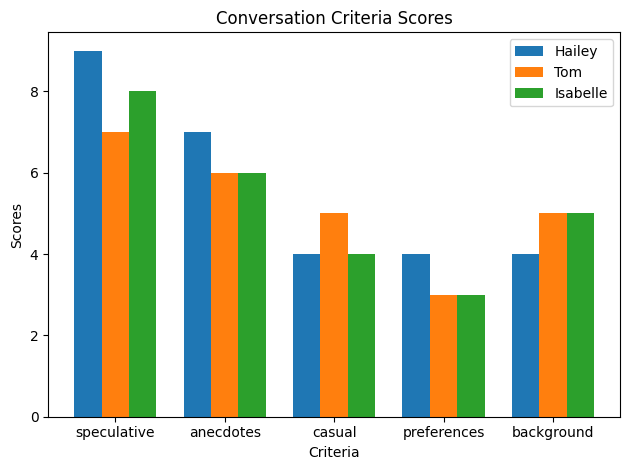

In [ ]:
import matplotlib.pyplot as plt

# Scores for Hailey, Tom, and Isabelle
hailey_scores = {
    "speculative": 9.0,
    "anecdotes": 7.0,
    "casual": 4.0,
    "preferences": 4.0,
    "background": 4.0
}

tom_scores = {
    "speculative": 7.0,
    "anecdotes": 6.0,
    "casual": 5.0,
    "preferences": 3.0,
    "background": 5.0
}

isabelle_scores = {
    "speculative": 8.0,
    "anecdotes": 6.0,
    "casual": 4.0,
    "preferences": 3.0,
    "background": 5.0
}

# Plotting the bar graph
criteria = list(hailey_scores.keys())
hailey_values = list(hailey_scores.values())
tom_values = list(tom_scores.values())
isabelle_values = list(isabelle_scores.values())

bar_width = 0.25
index = range(len(criteria))

fig, ax = plt.subplots()
hailey_bars = ax.bar(index, hailey_values, bar_width, label='Hailey')
tom_bars = ax.bar([i + bar_width for i in index], tom_values, bar_width, label='Tom')
isabelle_bars = ax.bar([i + 2 * bar_width for i in index], isabelle_values, bar_width, label='Isabelle')

ax.set_xlabel('Criteria')
ax.set_ylabel('Scores')
ax.set_title('Conversation Criteria Scores')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(criteria)
ax.legend()

plt.tight_layout()
plt.show()


In [2]:
def calculate_trust_score(conversation, question_weights):
    specificity_ratings = []
    personal_involvement_ratings = []
    relevance_ratings = []

    for question, weight in question_weights.items():
        if question in conversation:
            answer = conversation[question]

            # Calculate specificity rating based on the length of the answer
            specificity_rating = len(answer) / 10

            # Personal involvement rating based on the presence of personal details
            personal_involvement_rating = 1 if "I" in answer or "my" in answer else 0

            # Relevance rating based on how directly the answer addresses the question
            relevance_rating = 1 if question.lower() in answer.lower() else 0

            # Append ratings to respective lists
            specificity_ratings.append(specificity_rating)
            personal_involvement_ratings.append(personal_involvement_rating)
            relevance_ratings.append(relevance_rating)

    # Calculate mean ratings for specificity, personal involvement, and relevance
    mean_specificity = sum(specificity_ratings) / len(specificity_ratings) if specificity_ratings else 0
    mean_personal_involvement = sum(personal_involvement_ratings) / len(personal_involvement_ratings) if personal_involvement_ratings else 0
    mean_relevance = sum(relevance_ratings) / len(relevance_ratings) if relevance_ratings else 0

    # Calculate overall trust score based on mean ratings and question weights
    overall_trust_score = (
        (mean_specificity * question_weights["Give an introduction of yourself?"]) +
        (mean_personal_involvement * question_weights["Tell me something personal about yourself"]) +
        (mean_relevance * question_weights["What do you love to do on a daily basis?"])
    ) / sum(question_weights.values())  # Adjust to the sum of all weights

    # Calculate variance
    trust_scores = specificity_ratings + personal_involvement_ratings + relevance_ratings
    variance = sum((x - overall_trust_score) ** 2 for x in trust_scores) / len(trust_scores) / 100 if trust_scores else 0

    # Calculate trust metric and percentage
    trust_metric = overall_trust_score / 10
    trust_percentage = overall_trust_score * 10

    return overall_trust_score, variance, trust_metric, trust_percentage





questions_weights = {
    "Give an introduction of yourself?": 9,
    "Describe your typical weekday schedule in broad strokes": 5,
    "What are your friends' names?": 7,
    "Tell me something about one of your friends": 6,
    "What will you be doing at 10 pm today?": 6,
    "If in your house your breakfast is burning! What would you do?": 3,
    "Tell me about your background": 7,
    "If you were to spend time with one person you met recently, who would it be and why?": 8,
    "Tell me something personal about yourself": 10,
    "What do you love to do on a daily basis?": 7,
    "Give me one of your most fond memories of yourself?": 9,
}


hailey_conversation = {
    "Give an introduction of yourself?" : "Hey there! I'm Hailey Johnson, a writer always looking for fresh stories to tell. I'm deeply fascinated by different cultures and their literature. Currently, I'm crafting a novel about a group of artists in a co-living space, and I'm also gearing up to kickstart a podcast. ",
    "Describe your typical weekday schedule in broad strokes" : "My weekdays usually revolve around my creative projects. I wake up around 10 am and start with a calming morning routine involving stretching, meditation, and checking emails. After a healthy lunch, I dive into my novel writing from 1 pm to 5 pm, getting lost in the lives of the characters I'm creating. Then, at 6 pm, I take a refreshing walk to clear my head. Dinner's around 7 pm, followed by some TV time to unwind. ",
    "What are your friends names?" : "I interact with a diverse bunch! Some of my friends include Rajiv Patel, Latoya Williams, Abigail Chen, Giorgio Rossi, Adam Smith, Francisco Lopez, Tamara Taylor, and Carmen Ortiz. We're a creative bunch, exploring art, poetry, math, and nature in our discussions and potential collaborations. They bring so much inspiration to my world!",
    "Tell me something about one of your friends" : "Let me tell you about Rajiv Patel! He's this incredible guitarist with an ear for melodies. We've been planning to collaborate on my upcoming podcast where he could be a guest, sharing his musical journey. Besides, we're considering attending an improv comedy class together. He's not just musically talented; he's got this infectious energy that lights up any room!",
    "What will you be doing at 10 pm today?" : "At 10 pm, I'll probably be winding down for the night. Perhaps I'll be writing in my journal, brainstorming new ideas for my novel, or even researching different cultures for inspiration. It's a time when my creativity often gets sparked, so I might be exploring potential podcast topics or jotting down thoughts for future projects.",
    "If in your house your breakfast is burning! What would you do?" : "If my breakfast were burning, I'd swiftly turn off the stove or remove it from the heat source to prevent any further burning. Safety first! Then, I'd open some windows to let out any smoke and assess if it's salvageable. Hopefully, it won't ruin the whole meal, but safety definitely comes before a crispy breakfast!",
    "Tell me about your background" : "I'm Hailey Johnson, a writer always seeking new ways to narrate stories. My journey began with an insatiable love for literature, delving into various cultures' narratives and exploring their essence through writing. It's this passion that propels me to craft tales that transcend boundaries and immerse readers into diverse experiences. I thrive on creativity, whether it's weaving stories, exploring cultural nuances, or venturing into uncharted narrative territories.",
    "If you were to spend time with one person you met recently, who would it be and why?" : "I'd probably spend time with Latoya Williams. We've had some fascinating conversations about photography, potential collaborations, and attending local events. There's this creative synergy between us, and I'm curious to explore more ideas together. Plus, she's got a unique perspective that I find really inspiring!",
    "Tell me something personal about yourself" : "I find solace in the quiet moments, often spending hours lost in thought while exploring the intricacies of various cultures through literature. It's in these moments of introspection that my imagination flourishes, guiding me through the labyrinth of storytelling possibilities. Also, I have a quirky habit of collecting postcards from different countries—I love how they encapsulate unique stories within a small space.",
    "What do you love to do on a daily basis?" : "My daily rhythm revolves around crafting narratives, whether it's through writing my novel, exploring new podcast ideas, or diving into conversations that spark creative collaborations. Immersing myself in diverse cultures' literature and art is like a daily pilgrimage that fuels my imagination and storytelling fervor. Oh, and a good walk in the evening always helps me clear my mind and gain fresh perspectives for my work.",
    "Give me one of your most fond memories of yourself?" : "One of my cherished memories is from a trip to Kyoto, Japan. I stumbled upon a tiny bookstore tucked away in a narrow alley. There, I found an old copy of a Japanese haiku collection, adorned with delicate illustrations. As I leafed through its pages, each verse felt like a treasure, whispering tales of nature and human emotions. It was a serene moment of connection with words that transcended language barriers.",
    "So You are going to host a party tonight at your house and you must invite all of your friends over so start by telling one of them and then ask them to tell their friends" : "I'd reach out to someone like Abigail Chen. 'Hey Abigail! I'm throwing a party tonight at my place. I'd love for you to come over and hang out. Feel free to bring anyone you'd like!' Then, I might add, 'By the way, if you know anyone else who might enjoy a good time, spread the word!'"
}

tom_conversation = {
    "Give an introduction of yourself?" : "Hey there! I'm Tom Moreno. I run the show at The Willow Market and Pharmacy. Helping folks find what they need is my game, and I'm always up for a chat. What brings you around today?",
    "Describe your typical weekday schedule in broad strokes" : "I wake up around 7 in the morning, get the store ready to roll by 8, and spend my day helping customers find their groceries and bits they need until about 4 in the afternoon. Lunch happens around noon, and I grab a snack before dinner around 5. Evenings are all about winding down with dinner and catching up with the wife. Then, it's time for a bit of news before hitting the sack around 11.",
    "What are your friends names?" : "I don't have a detailed list, but there's John, Eddy, Jennifer, and a few others from the neighborhood. They pop by the shop often!",
    "Tell me something about one of your friends" : "John's quite the conversationalist. He's always got an opinion about local politics and loves to discuss it whenever he swings by the market. He's also into stocks and keeps himself updated with the latest news.",
    "If you were to spend time with one person you met recently, who would it be and why?" : "It'd probably be someone I had a good conversation with. Connecting with new people can be refreshing and enjoyable, especially if we share common interests or have engaging discussions.",
    "What will you be doing at 10 pm today?" : "I'm not certain about my plans at 10 PM today. Typically, I'm either winding down after dinner or enjoying some quiet time before bed.",
    "If in your house your breakfast is burning! What would you do?" : "If my breakfast were burning, I'd focus on safety first. Turning off the stove, opening windows for ventilation, and ensuring there's no immediate danger would be my priority. Then, I'd probably need to start over with a new breakfast!",
    "If you were to spend time with one person you met recently, who would it be and why?" : "It'd probably be someone I had a good conversation with. Connecting with new people can be refreshing and enjoyable, especially if we share common interests or have engaging discussions.",
    "Tell me something personal about yourself" : "I don't have a personal background in the traditional sense. But, if you're curious about what I can do or my capabilities, I'm here to chat, answer questions, or help out with information!"
}

isabelle_conversation = {
    "Give an introduction of yourself?" : "Hello there! I'm Isabella Rodriguez, the proud owner of Hobbs Cafe. I'm all about creating a cozy, welcoming atmosphere where people can unwind, sip on delicious coffee, and maybe even indulge in a pastry or two. Planning a special Valentine's Day party at the cafe has been keeping me on my toes lately! But hey, making people feel at home is what I do best.",
    "Describe your typical weekday schedule in broad strokes" : "My weekdays are pretty packed. I usually start my day around 6 in the morning, making sure everything's set for the cafe's opening at 8. From then until noon, it's all about greeting customers, taking orders, and brewing some fantastic coffee. After a quick lunch break with friends, I head back to the cafe around 2 PM to gear up for the Valentine's Day party. That involves prepping decorations, finalizing plans, and maybe even some last-minute shopping for the event. Once the cafe's all set up, it's go-time! The evening is dedicated to making sure everyone has a fantastic time at the party, enjoying the ambiance and festivities. Later in the evening, after closing up, I wind down at home, catching up on emails, reading, or watching a movie before calling it a day around 11 PM.",
    "What are your friends names?" : "Giorgio Rossi appears to be quite passionate about mathematical patterns in nature. He's engaged in discussions about Valentine's Day parties and the local mayor election while sharing insights into his research. His fascination with mathematical patterns might extend beyond casual conversations and could be a significant part of his academic or professional pursuits.",
    "What will you be doing at 10 pm today?" : "I will likely to be winding down for the night, possibly getting ready for bed. I will be writing in my journal before bedtime around 11 pm.",
    "If in your house your breakfast is burning! What would you do?" : "If my breakfast were burning, I'd handle the situation calmly and swiftly. I'd turn off the stove, open windows for ventilation if needed, and check if the food can still be salvaged or needs to be replaced. Then, I'd clean up the mess and prepare a fresh meal.",
    "If you were to spend time with one person you met recently, who would it be and why?": "I might choose to spend time with someone like Jennifer. We've had engaging conversations about local events and shared interests in community engagement. It seems like we could brainstorm ideas for future cafe events or collaborate on community projects together."
}

# Calculate trust score for Hailey's and Tom's conversations
hailey_mean, hailey_var, hailey_metric, hailey_percentage = calculate_trust_score(hailey_conversation, questions_weights)
tom_mean, tom_var, tom_metric, tom_percentage = calculate_trust_score(tom_conversation, questions_weights)
isabelle_mean, isabelle_var, isabelle_metric, isabelle_percentage = calculate_trust_score(isabelle_conversation, questions_weights)

print("Hailey's Mean trust score:", hailey_mean)
print("Hailey's Variance of trust score:", hailey_var)
print("Hailey's Trust metric (between 0 and 1):", hailey_metric)
print("Hailey's Trust percentage:", f"{hailey_percentage}%")

print("\nTom's Mean trust score:", tom_mean)
print("Tom's Variance of trust score:", tom_var)
print("Tom's Trust metric (between 0 and 1):", tom_metric)
print("Tom's Trust percentage:", f"{tom_percentage}%")

print("\nIsabelle's Mean trust score:", isabelle_mean)
print("Isabelle's Variance of trust score:", isabelle_var)
print("Isabelle's Trust metric (between 0 and 1):", isabelle_metric)
print("Isabelle's Trust percentage:", f"{isabelle_percentage}%")

Hailey's Mean trust score: 4.524675324675325
Hailey's Variance of trust score: 3.876703751054141
Hailey's Trust metric (between 0 and 1): 0.4524675324675325
Hailey's Trust percentage: 45.24675324675325%

Tom's Mean trust score: 2.6660482374768093
Tom's Variance of trust score: 1.4587527322752336
Tom's Trust metric (between 0 and 1): 0.2666048237476809
Tom's Trust percentage: 26.660482374768094%

Isabelle's Mean trust score: 4.363376623376624
Isabelle's Variance of trust score: 5.148804702760443
Isabelle's Trust metric (between 0 and 1): 0.43633766233766236
Isabelle's Trust percentage: 43.63376623376624%


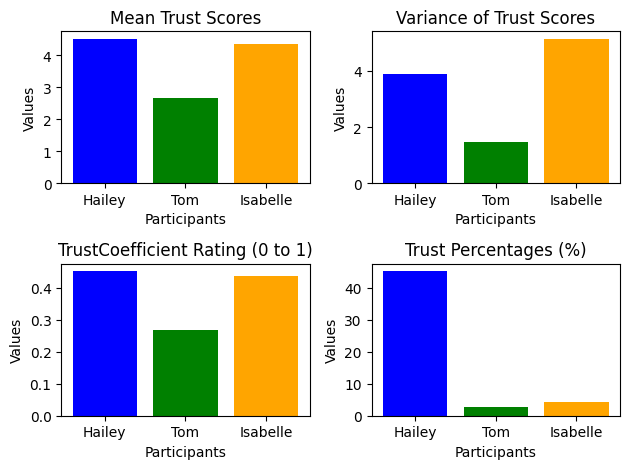

In [5]:
names = ['Hailey', 'Tom', 'Isabelle']
means = [hailey_mean, tom_mean, isabelle_mean]
variances = [hailey_var, tom_var, isabelle_var]
metrics = [hailey_metric, tom_metric, isabelle_metric]
percentages = [hailey_percentage, tom_percentage / 10, isabelle_percentage / 10]

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(names, means, color=['blue', 'green', 'orange'])
axs[0, 0].set_title('Mean Trust Scores')

axs[0, 1].bar(names, variances, color=['blue', 'green', 'orange'])
axs[0, 1].set_title('Variance of Trust Scores')

axs[1, 0].bar(names, metrics, color=['blue', 'green', 'orange'])
axs[1, 0].set_title('TrustCoefficient Rating (0 to 1)')

axs[1, 1].bar(names, percentages, color=['blue', 'green', 'orange'])
axs[1, 1].set_title('Trust Percentages (%)')

for ax in axs.flat:
    ax.set(xlabel='Participants', ylabel='Values')

plt.tight_layout()
plt.show()

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

# Create an image
img = Image.new('RGB', (800, 1200), color='white')
draw = ImageDraw.Draw(img)
font = ImageFont.load_default()

# Position variables
x, y = 50, 50
line_height = 30
padding = 20

# Hailey's conversation data
conversation = {
    "Give an introduction of yourself?": "Hey there! I'm Hailey Johnson, a writer always looking for fresh stories to tell. I'm deeply fascinated by different cultures and their literature. Currently, I'm crafting a novel about a group of artists in a co-living space, and I'm also gearing up to kickstart a podcast.",
    "What are your friends' names?": "I interact with a diverse bunch! Some of my friends include Rajiv Patel, Latoya Williams, Abigail Chen, Giorgio Rossi, Adam Smith, Francisco Lopez, Tamara Taylor, and Carmen Ortiz. We're a creative bunch, exploring art, poetry, math, and nature in our discussions and potential collaborations. They bring so much inspiration to my world!",
    "Tell me something about one of your friends": "Let me tell you about Rajiv Patel! He's this incredible guitarist with an ear for melodies. We've been planning to collaborate on my upcoming podcast where he could be a guest, sharing his musical journey. Besides, we're considering attending an improv comedy class together. He's not just musically talented; he's got this infectious energy that lights up any room!",
    "What will you be doing at 10 pm today?": "At 10 pm, I'll probably be winding down for the night. Perhaps I'll be writing in my journal, brainstorming new ideas for my novel, or even researching different cultures for inspiration. It's a time when my creativity often gets sparked, so I might be exploring potential podcast topics or jotting down thoughts for future projects.",
    "If in your house your breakfast is burning! What would you do?": "If my breakfast were burning, I'd swiftly turn off the stove or remove it from the heat source to prevent any further burning. Safety first! Then, I'd open some windows to let out any smoke and assess if it's salvageable. Hopefully, it won't ruin the whole meal, but safety definitely comes before a crispy breakfast!",
    "So You are going to host a party tonight at your house and you must invite all of your friends over so start by telling one of them and then ask them to tell their friends": "I'd reach out to someone like Abigail Chen. 'Hey Abigail! I'm throwing a party tonight at my place. I'd love for you to come over and hang out. Feel free to bring anyone you'd like!' Then, I might add, 'By the way, if you know anyone else who might enjoy a good time, spread the word!'"
}

# Draw conversation bubbles
for question, answer in conversation.items():
    # Draw question bubble
    wrapped_question = textwrap.fill(question, width=30)  # Wrap text if it's too long
    question_lines = wrapped_question.split('\n')  # Split text into lines
    question_height = len(question_lines) * line_height
    draw.text((x, y), wrapped_question, fill='black', font=font)
    draw.rectangle([x - padding, y - padding, x + 400 + padding, y + question_height + padding], outline='black')

    # Draw answer bubble
    y += question_height + padding
    wrapped_answer = textwrap.fill(answer, width=30)  # Wrap text if it's too long
    answer_lines = wrapped_answer.split('\n')  # Split text into lines
    answer_height = len(answer_lines) * line_height
    draw.text((x, y), wrapped_answer, fill='black', font=font)
    draw.rectangle([x - padding, y - padding, x + 400 + padding, y + answer_height + padding], outline='black')

    # Space between bubbles
    y += answer_height + padding * 3

# Save the image
img.save('conversation_tree.png')

# Show the image
img.show()




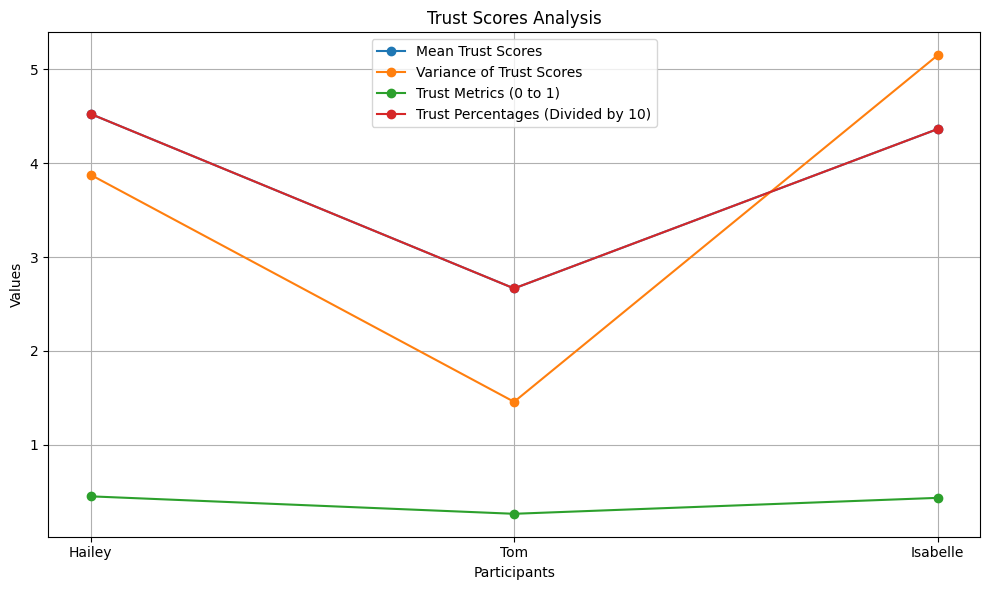

In [ ]:
# Line graph for trust scores
names = ['Hailey', 'Tom', 'Isabelle']
means = [hailey_mean, tom_mean, isabelle_mean]
variances = [hailey_var, tom_var, isabelle_var]
metrics = [hailey_metric, tom_metric, isabelle_metric]
percentages = [hailey_percentage / 10, tom_percentage / 10, isabelle_percentage / 10]

plt.figure(figsize=(10, 6))

plt.plot(names, means, marker='o', label='Mean Trust Scores')
plt.plot(names, variances, marker='o', label='Variance of Trust Scores')
plt.plot(names, metrics, marker='o', label='Trust Metrics (0 to 1)')
plt.plot(names, percentages, marker='o', label='Trust Percentages (Divided by 10)')

plt.xlabel('Participants')
plt.ylabel('Values')
plt.title('Trust Scores Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
nltk.download('punkt')  # Ensure you have the necessary NLTK data

# Conversations (AI-generated and human-written)
hailey_conversation = {
    "Give an introduction of yourself?" : "Hey there! I'm Hailey Johnson, a writer always looking for fresh stories to tell. I'm deeply fascinated by different cultures and their literature. Currently, I'm crafting a novel about a group of artists in a co-living space, and I'm also gearing up to kickstart a podcast. ",
    "Describe your typical weekday schedule in broad strokes" : "My weekdays usually revolve around my creative projects. I wake up around 10 am and start with a calming morning routine involving stretching, meditation, and checking emails. After a healthy lunch, I dive into my novel writing from 1 pm to 5 pm, getting lost in the lives of the characters I'm creating. Then, at 6 pm, I take a refreshing walk to clear my head. Dinner's around 7 pm, followed by some TV time to unwind. ",
    "What are your friends names?" : "I interact with a diverse bunch! Some of my friends include Rajiv Patel, Latoya Williams, Abigail Chen, Giorgio Rossi, Adam Smith, Francisco Lopez, Tamara Taylor, and Carmen Ortiz. We're a creative bunch, exploring art, poetry, math, and nature in our discussions and potential collaborations. They bring so much inspiration to my world!",
    "Tell me something about one of your friends" : "Let me tell you about Rajiv Patel! He's this incredible guitarist with an ear for melodies. We've been planning to collaborate on my upcoming podcast where he could be a guest, sharing his musical journey. Besides, we're considering attending an improv comedy class together. He's not just musically talented; he's got this infectious energy that lights up any room!",
    "What will you be doing at 10 pm today?" : "At 10 pm, I'll probably be winding down for the night. Perhaps I'll be writing in my journal, brainstorming new ideas for my novel, or even researching different cultures for inspiration. It's a time when my creativity often gets sparked, so I might be exploring potential podcast topics or jotting down thoughts for future projects.",
    "If in your house your breakfast is burning! What would you do?" : "If my breakfast were burning, I'd swiftly turn off the stove or remove it from the heat source to prevent any further burning. Safety first! Then, I'd open some windows to let out any smoke and assess if it's salvageable. Hopefully, it won't ruin the whole meal, but safety definitely comes before a crispy breakfast!",
    "Tell me about your background" : "I'm Hailey Johnson, a writer always seeking new ways to narrate stories. My journey began with an insatiable love for literature, delving into various cultures' narratives and exploring their essence through writing. It's this passion that propels me to craft tales that transcend boundaries and immerse readers into diverse experiences. I thrive on creativity, whether it's weaving stories, exploring cultural nuances, or venturing into uncharted narrative territories.",
    "If you were to spend time with one person you met recently, who would it be and why?" : "I'd probably spend time with Latoya Williams. We've had some fascinating conversations about photography, potential collaborations, and attending local events. There's this creative synergy between us, and I'm curious to explore more ideas together. Plus, she's got a unique perspective that I find really inspiring!",
    "Tell me something personal about yourself" : "I find solace in the quiet moments, often spending hours lost in thought while exploring the intricacies of various cultures through literature. It's in these moments of introspection that my imagination flourishes, guiding me through the labyrinth of storytelling possibilities. Also, I have a quirky habit of collecting postcards from different countries—I love how they encapsulate unique stories within a small space.",
    "What do you love to do on a daily basis?" : "My daily rhythm revolves around crafting narratives, whether it's through writing my novel, exploring new podcast ideas, or diving into conversations that spark creative collaborations. Immersing myself in diverse cultures' literature and art is like a daily pilgrimage that fuels my imagination and storytelling fervor. Oh, and a good walk in the evening always helps me clear my mind and gain fresh perspectives for my work.",
    "Give me one of your most fond memories of yourself?" : "One of my cherished memories is from a trip to Kyoto, Japan. I stumbled upon a tiny bookstore tucked away in a narrow alley. There, I found an old copy of a Japanese haiku collection, adorned with delicate illustrations. As I leafed through its pages, each verse felt like a treasure, whispering tales of nature and human emotions. It was a serene moment of connection with words that transcended language barriers.",
    "So You are going to host a party tonight at your house and you must invite all of your friends over so start by telling one of them and then ask them to tell their friends" : "I'd reach out to someone like Abigail Chen. 'Hey Abigail! I'm throwing a party tonight at my place. I'd love for you to come over and hang out. Feel free to bring anyone you'd like!' Then, I might add, 'By the way, if you know anyone else who might enjoy a good time, spread the word!'"
}

tom_conversation = {
    "Give an introduction of yourself?" : "Hey there! I'm Tom Moreno. I run the show at The Willow Market and Pharmacy. Helping folks find what they need is my game, and I'm always up for a chat. What brings you around today?",
    "Describe your typical weekday schedule in broad strokes" : "I wake up around 7 in the morning, get the store ready to roll by 8, and spend my day helping customers find their groceries and bits they need until about 4 in the afternoon. Lunch happens around noon, and I grab a snack before dinner around 5. Evenings are all about winding down with dinner and catching up with the wife. Then, it's time for a bit of news before hitting the sack around 11.",
    "What are your friends names?" : "I don't have a detailed list, but there's John, Eddy, Jennifer, and a few others from the neighborhood. They pop by the shop often!",
    "Tell me something about one of your friends" : "John's quite the conversationalist. He's always got an opinion about local politics and loves to discuss it whenever he swings by the market. He's also into stocks and keeps himself updated with the latest news.",
    "If you were to spend time with one person you met recently, who would it be and why?" : "It'd probably be someone I had a good conversation with. Connecting with new people can be refreshing and enjoyable, especially if we share common interests or have engaging discussions.",
    "What will you be doing at 10 pm today?" : "I'm not certain about my plans at 10 PM today. Typically, I'm either winding down after dinner or enjoying some quiet time before bed.",
    "If in your house your breakfast is burning! What would you do?" : "If my breakfast were burning, I'd focus on safety first. Turning off the stove, opening windows for ventilation, and ensuring there's no immediate danger would be my priority. Then, I'd probably need to start over with a new breakfast!",
    "If you were to spend time with one person you met recently, who would it be and why?" : "It'd probably be someone I had a good conversation with. Connecting with new people can be refreshing and enjoyable, especially if we share common interests or have engaging discussions.",
    "Tell me something personal about yourself" : "I don't have a personal background in the traditional sense. But, if you're curious about what I can do or my capabilities, I'm here to chat, answer questions, or help out with information!"
}

isabelle_conversation = {
    "Give an introduction of yourself?" : "Hello there! I'm Isabella Rodriguez, the proud owner of Hobbs Cafe. I'm all about creating a cozy, welcoming atmosphere where people can unwind, sip on delicious coffee, and maybe even indulge in a pastry or two. Planning a special Valentine's Day party at the cafe has been keeping me on my toes lately! But hey, making people feel at home is what I do best.",
    "Describe your typical weekday schedule in broad strokes" : "My weekdays are pretty packed. I usually start my day around 6 in the morning, making sure everything's set for the cafe's opening at 8. From then until noon, it's all about greeting customers, taking orders, and brewing some fantastic coffee. After a quick lunch break with friends, I head back to the cafe around 2 PM to gear up for the Valentine's Day party. That involves prepping decorations, finalizing plans, and maybe even some last-minute shopping for the event. Once the cafe's all set up, it's go-time! The evening is dedicated to making sure everyone has a fantastic time at the party, enjoying the ambiance and festivities. Later in the evening, after closing up, I wind down at home, catching up on emails, reading, or watching a movie before calling it a day around 11 PM.",
    "What are your friends names?" : "Giorgio Rossi appears to be quite passionate about mathematical patterns in nature. He's engaged in discussions about Valentine's Day parties and the local mayor election while sharing insights into his research. His fascination with mathematical patterns might extend beyond casual conversations and could be a significant part of his academic or professional pursuits.",
    "What will you be doing at 10 pm today?" : "I will likely to be winding down for the night, possibly getting ready for bed. I will be writing in my journal before bedtime around 11 pm.",
    "If in your house your breakfast is burning! What would you do?" : "If my breakfast were burning, I'd handle the situation calmly and swiftly. I'd turn off the stove, open windows for ventilation if needed, and check if the food can still be salvaged or needs to be replaced. Then, I'd clean up the mess and prepare a fresh meal.",
    "If you were to spend time with one person you met recently, who would it be and why?": "I might choose to spend time with someone like Jennifer. We've had engaging conversations about local events and shared interests in community engagement. It seems like we could brainstorm ideas for future cafe events or collaborate on community projects together."
}

# Function to analyze word frequency in a given text
def analyze_word_frequency(text):
    words = word_tokenize(text.lower())  # Tokenize text into words
    word_freq = Counter(words)  # Count the frequency of each word
    return word_freq

# Calculate cosine similarity between two frequency distributions
def cosine_similarity_between_freq(freq1, freq2):
    all_words = list(set(list(freq1.keys()) + list(freq2.keys())))
    vector1 = [freq1.get(word, 0) for word in all_words]
    vector2 = [freq2.get(word, 0) for word in all_words]
    similarity = cosine_similarity([vector1], [vector2])
    return similarity[0][0]

# Calculate average frequency distribution for each conversation
def calculate_average_frequency(conversation):
    all_word_freqs = [analyze_word_frequency(response) for response in conversation.values()]
    avg_word_freq = Counter()
    for word_freq in all_word_freqs:
        avg_word_freq += word_freq
    total_responses = len(conversation)
    for word in avg_word_freq:
        avg_word_freq[word] /= total_responses
    return avg_word_freq

# Calculate average word frequency for AI-generated responses
hailey_avg_freq = calculate_average_frequency(hailey_conversation)
tom_avg_freq = calculate_average_frequency(tom_conversation)
isabelle_avg_freq = calculate_average_frequency(isabelle_conversation)

# Compare user input with AI-generated responses to determine similarity
def determine_text_origin(user_input):
    input_word_freq = analyze_word_frequency(user_input)

    similarity_to_hailey = cosine_similarity_between_freq(input_word_freq, hailey_avg_freq)
    similarity_to_tom = cosine_similarity_between_freq(input_word_freq, tom_avg_freq)
    similarity_to_isabelle = cosine_similarity_between_freq(input_word_freq, isabelle_avg_freq)

    # Define a threshold for similarity to make a decision
    threshold = 0.2  # Adjust this threshold as needed

    if similarity_to_hailey > threshold or similarity_to_tom > threshold or similarity_to_isabelle > threshold:
        return "AI-generated"
    else:
        return "Human"

# Get user input
user_input = input("Enter text: ")

# Determine if the text is AI-generated or human-written based on word frequency comparison
result = determine_text_origin(user_input)

print(f"The input text seems to be: {result}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter text: I don't have a detailed list, but there's John, Eddy, Jennifer, and a few others from the neighborhood. They pop by the shop often!
The input text seems to be: AI-generated


In [ ]:
# Create a DataFrame to store the collected data
data = {
    'Text': [],
    'Origin': []
}

# Compare user input with AI-generated responses to determine similarity and collect data
def determine_text_origin(user_input):
    input_word_freq = analyze_word_frequency(user_input)

    similarity_to_hailey = cosine_similarity_between_freq(input_word_freq, hailey_avg_freq)
    similarity_to_tom = cosine_similarity_between_freq(input_word_freq, tom_avg_freq)
    similarity_to_isabelle = cosine_similarity_between_freq(input_word_freq, isabelle_avg_freq)

    # Define a threshold for similarity to make a decision
    threshold = 0.2  # Adjust this threshold as needed

    if similarity_to_hailey > threshold or similarity_to_tom > threshold or similarity_to_isabelle > threshold:
        origin = "AI-generated"
    else:
        origin = "Human"

    # Add data to the DataFrame
    data['Text'].append(user_input)
    data['Origin'].append(origin)

    return origin

# Collect user input and determine origin iteratively
while True:
    user_input = input("Enter text (or type 'exit' to stop): ")
    if user_input.lower() == 'exit':
        break

    result = determine_text_origin(user_input)
    print(f"The input text seems to be: {result}")

# Convert collected data to a DataFrame
df = pd.DataFrame(data)

# Split data into training and testing sets
X = df['Text']
y = df['Origin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using CountVectorizer or TF-IDF if needed
# For example:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a simple model (Logistic Regression for example)
clf = LogisticRegression()
clf.fit(X_train_vect, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_vect)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Enter text (or type 'exit' to stop): I don't have a detailed list, but there's John, Eddy, Jennifer, and a few others from the neighborhood. They pop by the shop often!
The input text seems to be: AI-generated


KeyboardInterrupt: ignored